# this code is a positive control, part2
# I use simulation data, where Smad pathway is simulated with random noise, AND this time gene expression depends on other variables

# I get good diffusion Maps for Smad and Snail and can show that Smad DMAPS CANNOT accurately predict Snail DMAPS in this case

In [1]:

from pathlib import Path

cwd = Path().resolve()
print(cwd)

/Users/frick/Dparams/DParamsFinal_v1


In [2]:
##

In [3]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 

conditionid = 'exphiddenvars_proteinvar'
specid = 'model_med-LEV-tot-LEV_gpy_GRADIENT_pos2neg'
cond2 = 'tcut'
exp_path = '' + conditionid + '/'
csvsavepath = '_dmap_csv_' + conditionid + cond2+ specid + 'copyclean/'
print(specid)

repo = str(cwd) +'/'

data_path = repo + exp_path + "/"
data_path2 = data_path
fig_path = repo + "testfig/"

#determine data for generating input and output maps
if conditionid == 'exp4' or conditionid == 'exp3':
    params = "smadMatrix.csv"
    params2 = "outputMatrixTOTAL.csv"
    timematrix = "timematrix.csv"
    datamatrix = "dosageData.csv"
    filename = data_path + params
    tcut = 'no'
    tscale = 'no'
else:
    params = "rsmad.csv"
    params2 = "zgene.csv"
    timematrix = "timematrix.csv"
    datamatrix = "dosageData.csv"
    filename = data_path + params
    print('it elsed')
    tcut = 'yes'
    tscale = 'yes'
    

#in this processed form, I find that using DMAPs does not improve the accuracy of representing the data above using timepoint combinations
#smad abundance vs Snail difference

#this is bad ass
from pathlib import Path
cwd = Path().resolve()
print(cwd)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode
import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal

import re



from dmap_sp_chrisNEW import *

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)




import os
print(not (os.path.isdir(fig_path)))
if not (os.path.isdir(fig_path)):
    print('making' + fig_path)
    os.mkdir(fig_path)

name = "16CHRIS"
%matplotlib inline

/Users/frick/Dparams/DParamsFinal_v1
model_med-LEV-tot-LEV_gpy_GRADIENT_pos2neg
it elsed
/Users/frick/Dparams/DParamsFinal_v1
False


# Files that you should save
data_in, data_out

time_in, time_out

[notes on how you processed in and out]

evecs,evals,eps [in] -- evecs,evals,eps [out]

ev_in, ev_out




In [4]:

def funky(x, p1,p2,p3,p4):
    return p1*(x**3) + p2*(x**2) + p3*(x) + p4
#   return p1*np.cos(p2*x) + p2*np.sin(p1*x)

def iqr_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    outidx = (x < (q1 - (1.5 * iqr))) | (x > (q3 + (1.5 * iqr)))
    return outidx

def residuals_of_poly4_fit(x0,y0):
    xidx = np.argsort(x0)
    xix = x0[xidx]
    yix = y0[xidx]
    poptx, pcovx = scipy.optimize.curve_fit(funky, xix, yix,p0=(1.0,0.2,0.1,0.1),maxfev=100000)
    px1 = poptx[0]
    px2 = poptx[1]
    px3 = poptx[2]
    px4 = poptx[3]
    fy = funky(xix,px1,px2,px3,px4)
    residuals1 = (yix - fy)

    xidx = np.argsort(y0)
    xiy = x0[xidx]
    yiy = y0[xidx]
    popty, pcovy = scipy.optimize.curve_fit(funky, yiy, xiy,p0=(1.0,0.2,0.1,0.1),maxfev=100000)
    py1 = popty[0]
    py2 = popty[1]
    py3 = popty[2]
    py4 = popty[3]
    fx = funky(yiy,py1,py2,py3,py4)
    residuals2 = (xiy - fx)

#     residx1 = iqr_outlier(residuals1**2)
#     residx2 = iqr_outlier(residuals2**2)
    
    residx1 = numpy.zeros(np.shape(residuals1), dtype=bool)
    residx2 = numpy.zeros(np.shape(residuals2), dtype=bool)
    
    if sum(residuals1[~residx1]**2)<sum(residuals2[~residx2]**2):
        fres = sum(residuals1[~residx1]**2)
        popt = poptx
        xout = xix
        yout = funky(xix,popt[0],popt[1],popt[2],popt[3])
        iout = 0
    else:
        fres = sum(residuals2[~residx2]**2)
        popt = popty
        xout = funky(yiy,popt[0],popt[1],popt[2],popt[3])
        yout = yiy
        iout = 1

    return fres,popt,xout,yout,iout

def rescaleevecs(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals

#     showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
        
    return shave

def autodparam(evecs,evals,eps_eps,inoutstr):
    print('working on '+inoutstr)
    PTS = 5
    w1 = evecs[:,0]

    showev = evecs
    showevl = evals
    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]

#     yl1 = np.percentile(shave,0.1)
#     yl2 = np.percentile(shave,99.9)
    yl1 = np.percentile(evecs,0.1)
    yl2 = np.percentile(evecs,99.9)

    std = np.zeros(showevl.shape)
    
    # plot scatter of each dparam
    # determine standard deviation with outliers removed
    fig,ax = plt.subplots(PTS,PTS,figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    for i in range(PTS):
        for k in range(PTS):
            eigenindex = i*PTS+k
            x = range(0,len(showev[:,0]))
            y = shave[:,eigenindex]
#             y = evecs[:,eigenindex]
            sc1 = ax[i,k].scatter(x,y, 5, w1, cmap='jet')
            outy = iqr_outlier(y)
#             std[eigenindex] = np.absolute(np.std(y[~outy]))  
            std[eigenindex] = np.absolute(np.std(y))  
            ax[i,k].set_title([i,k,eigenindex])
            ax[i,k].set_ylim((yl1 - np.abs(yl1*0.5)),(yl2 + yl2))

    stdcut0 = np.max(std)/stdcut
    std = std-np.min(std[1:-1])
    stdcop = std.copy()
    
    #plot standard deviation of each dparam coordinate
    fig = plt.figure()
    plt.plot(np.abs(std),'k.-')
    plt.xlabel('dparam')
    plt.ylabel('stdev')

    
    #make plot showing stdev vals for each dparam
    xx = np.linspace(0,len(std)-1,len(std))
    yy = np.ones([len(std),1])*stdcut0
    plt.plot(xx,yy)
    
    keeperstdidx = np.abs(std)>stdcut0
    boolidx = numpy.array(keeperstdidx, dtype=bool)
    boolidx[0]=False
    keeprange = np.linspace(0,len(keeperstdidx)-1,len(keeperstdidx))
    keeperstd = keeprange[boolidx]
    
    #######

    #now that we know that eval[1] and evec[1] have significant variability plot other things with respect
    #to them. If they are functions of [1] then they are not important

    
    # sort the chosen eigenvectors based on who has max STDdev
    stdabs = np.abs(stdcop)
    keepvec =keeperstd.astype(int)
    stdval = stdabs[keepvec]
    cvec0 = np.argsort(stdval)
    cvec = cvec0[::-1]

    
    keepint =keeperstd.astype(int)
    keepint = keepint[cvec]
    shavesub = shave[:,keepint]
    tauscale = np.percentile(shavesub,95)-np.percentile(shavesub,5)
    tauscale=1
    fig,ax = plt.subplots(len(keeperstd),len(keeperstd),figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    
    tauraall = np.zeros([len(showevl),len(showevl)])
    for i in range(len(showevl)):
        for j in range(len(showevl)):
            eigy1=i
            eigy2=j
            x = showevl[eigy1]*showev[:,eigy1]
            y = showevl[eigy2]*showev[:,eigy2]

            outx = iqr_outlier(x)
            outy = iqr_outlier(y)
            outidx = outx|outy

            x0 = x[~outidx]
            y0 = y[~outidx]
            #             print(x0.shape,x.shape)
            xidx = np.argsort(x0)

#             fres,popt,xout,yout,iout = residuals_of_poly4_fit(x0,y0)
#             tauraall[i,j]=fres/np.sum([np.std(x0),np.std(y0)])
            
    #determine the correlation between different eigenvectors to determine unique dparams
    taura = np.zeros([len(keepint),len(keepint)])
    for i in range(len(keepint)):
        for j in range(len(keepint)):
            eigy1=keepint[i]
            eigy2=keepint[j]
#             x = showevl[eigy1]*showev[:,eigy1]
#             y = showevl[eigy2]*showev[:,eigy2]
            x = showev[:,eigy1]
            y = showev[:,eigy2]
            #using eigenvector without eigenvalue multiplication makes it easier to compare residuals values. 
        
#             tau, p_value = scipy.stats.kendalltau(x, y)
            
            outx = iqr_outlier(x)
            outy = iqr_outlier(y)
            outidx = outx|outy
 
            x0 = x[~outidx]
            y0 = y[~outidx]
#             print(x0.shape,x.shape)
            xidx = np.argsort(x0)
            
            fres,popt,xout,yout,iout = residuals_of_poly4_fit(x0,y0)
             
#             tauscale = np.sum(np.abs([np.std(x0),np.std(y0)]))   
            tauscale=1
            taur = np.round(fres,decimals=3)/tauscale
            taura[i,j]=np.absolute(taur)

            std = np.std(y)
#             print("i=",i,"j=",j)

            if len(keepint)>1:
                sc1 = ax[i,j].scatter(x,y, 5, w1, cmap='jet')
                ax[i,j].plot(xout,yout)
                ax[i,j].set_title([eigy1,eigy2, '%1.2f' % taur])
            else:
                sc1 = ax.scatter(x,y, 5, w1, cmap='jet')
                ax.plot(xout,yout)
                ax.set_title([eigy1,eigy2, '%1.2f' % taur])
            
            
#             if iout==0:
#                 ax[i,j].plot(xout,funky(xout,popt[0],popt[1],popt[2],popt[3]))
#             else:
#                 ax[i,j].plot(funky(yout,popt[0],popt[1],popt[2],popt[3]),yout)

                
           


    fig,ax = plt.subplots(1,1,sharey=True)
    plt.imshow( np.absolute(taura), cmap='viridis')
    plt.colorbar(extend='both')
#     plt.clim(0, 0.01);

#     tcut = np.max(tauraall[:])/taurcut
    tcut = taurcut

    fig,ax = plt.subplots(1,taura.shape[1],sharex=True,sharey=True,figsize=(12,3))
    for j in range(taura.shape[1]):
        xvec = np.linspace(0,taura.shape[1]-1,taura.shape[1])
        taurvec = taura[:,j]
        boolbool = np.ones(taurvec.shape,dtype=bool)
#         boolbool[j] = False
        yvec = np.ones(taurvec.shape)*(tcut)
        xv = xvec[boolbool]
        yv = taurvec[boolbool]
        yy = yvec[boolbool]
        ax[j].plot(xv[j+1:len(xv)],yv[j+1:len(xv)],'*-')
#         plt.ylim([0,cutoff*8])
        plt.xlim([0,len(boolbool)])
        ax[j].plot(xvec,yvec)
        ax[j].text(1, tcut*0.5, 'is a function of %g' % j)
#         ax[j].legend(xx[0:taura.shape[1]])



    #############

    print(tcut)
    removeme=[]
    for i in range(taura.shape[0]):
    #         if i not in removeme:
        tidx = taura[i,:]<(tcut) #find anything that is tightly correlated
        tidx[i] = False #set self correlation = false
        nvec = np.linspace(0,len(tidx)-1,len(tidx))
        if i>=i:
            tidx[0:i]=False
        nvec = np.linspace(0,len(tidx)-1,len(tidx))
        rm = nvec[tidx] 
        removeme = np.append(removeme,rm.astype(int))


      
    chuckz = np.unique(removeme.astype(int))
    tbidx = np.ones((keeperstd.shape), dtype=bool)
    tbidx[chuckz]=False
    keepdparams = keepint[tbidx]
    print('good '+inoutstr+' dparams are:', keepdparams.astype(int))
    return keepdparams

def plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
    #plot the Smad trajectories colored by info
    fig,ax = plt.subplots(2,len(ev_0),figsize=(len(ev_0)*3,3),sharey=False)

    x = np.transpose(tvec)
    y = np.transpose(traj)
    for j in range(2):
        for i in range(len(ev_0)):
#             print(ev_0)
            lp = np.linspace(0,1,y.shape[1])
            ev_in_v = ev_0[i]
            hh = np.argsort(evecs_0[:,ev_in_v])
            cmvec = lp[hh]
            color=iter(plt.cm.viridis(lp))
            for k in range(y.shape[1]):
                xs = x[:,hh[k]]
                xs0 = numpy.where(xs<0)
                tv0 = xs0[0]
                ys = y[:,hh[k]]

                if j==1:
                    ys2 = np.divide(ys,np.median(ys[tv0[:]]))
                else:
                    ys2 = ys

                c=next(color)
                if len(ev_0)==1:
                    ax[j].plot(ys2,c=c,linewidth=0.5)
                    ax[j].set_title(strstr+' dim %g' % (i+1))
                else:
                    ax[j,i].plot(ys2,c=c,linewidth=0.5)
                    ax[j,i].set_title(strstr+' dim %g' % (i+1))

                
def shaver(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals
    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
    return shave

def shaverscale(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals
    showevl = np.reciprocal(evals)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
    return shave


def autodparam2(evecs,evals,eps_eps,inoutstr):
    print('working on '+inoutstr)
    PTS = 5
    w1 = evecs[:,0]

    showev = evecs
    showevl = evals

    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]

    yl1 = np.percentile(shave,0.1)
    yl2 = np.percentile(shave,99.9)

    std = np.zeros(showevl.shape)
    
    # plot scatter of each dparam
    fig,ax = plt.subplots(PTS,PTS,figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    for i in range(PTS):
        for k in range(PTS):
            eigenindex = i*PTS+k
            x = range(0,len(showev[:,1]))
            y = showevl[eigenindex]*showev[:,eigenindex]
            sc1 = ax[i,k].scatter(x,y, 5, w1, cmap='jet')
            outy = iqr_outlier(y)
            std[eigenindex] = np.absolute(np.std(y[~outy]))  
            ax[i,k].set_title([i,k,eigenindex])
            plt.ylim((yl1 - np.abs(yl1*0.5)),(yl2 + yl2))

    stdcut0 = np.max(std)/stdcut
    std = std-np.min(std[1:-1])
    stdcop = std.copy()
    #plot standard deviation of each dparam coordinate
    fig = plt.figure()
    plt.plot(np.abs(std),'k.-')
    plt.xlabel('dparam')
    plt.ylabel('stdev')

    
    xx = np.linspace(0,len(std)-1,len(std))
    yy = np.ones([len(std),1])*stdcut0
    plt.plot(xx,yy)
    keeperstdidx = np.abs(std)>stdcut0
    boolidx = numpy.array(keeperstdidx, dtype=bool)
    boolidx[0]=False
    keeprange = np.linspace(0,len(keeperstdidx)-1,len(keeperstdidx))
    keeperstd = keeprange[boolidx]
    keepvec =keeperstd.astype(int)
    return keepvec
    
print('done')

done


In [5]:


crs = open(filename, "r")
counter = 1
for columns in ( raw.strip().split() for raw in crs ):  
    if counter > 1:
        break
#     print (columns[0])
    counter+=1


# load data files and rescale as necessary
datamatrix_path_in = data_path + params
datamatrix_path_out = data_path + params2
timematrix_path = data_path + timematrix
dosage_path = data_path + datamatrix

observed_data_in0 = np.genfromtxt(datamatrix_path_in, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
observed_data_out0 = np.genfromtxt(datamatrix_path_out, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
time_data0 = np.genfromtxt(timematrix_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
dosage_data = np.genfromtxt(dosage_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [6]:
def plot_all_doses(yset,t1,dosage_data):
    udose = np.unique(dosage_data)
    if len(udose)>10:
        dosage_data = np.round(dosage_data,1)
        udose = np.unique(dosage_data)
        print(udose)
    fig = plt.figure(figsize=(14,2))
    for i in range(len(udose)):
        u = udose[i]
        dd = np.where(dosage_data==u)
        didx = dd[0]
        ax = fig.add_subplot(1,len(udose),i+1)
        x = t1[didx,:]
        y = yset[didx,:]
        plt.plot(x.T,y.T)
        plt.ylim(np.min(yset.flatten()),np.max(yset.flatten()))
        plt.title(u)
        
    fig.subplots_adjust(wspace=0.3)
  


In [7]:
observed_data_in = observed_data_in0.copy()
observed_data_out = observed_data_out0.copy()    
time_data = time_data0.copy()
in0 = observed_data_in.copy() 
out0 = observed_data_out.copy()
t0 = time_data.copy()

if tcut == 'yes':
    tvec = t0[1,:]
    idx = (tvec<2) & (tvec>-0.5)
    t2 = (np.where(idx))[0]
    print(t2)
    observed_data_in = observed_data_in[:,t2]
    observed_data_out = observed_data_out[:,t2]  
    if tscale == 'yes':
        time_data = time_data[:,t2]*60
    else:
        time_data = time_data[:,t2]
    

    

# ## i think interpolating the data is important to get everything time synchronized
# ogdin = observed_data_in.copy()
# x = np.linspace(np.min(time_data[:]),np.max(time_data[:]),time_data.shape[1])
# time_datanew = time_data
# for k in range(0,observed_data_in.shape[0]): 
#     xp = time_data[k,:]
#     fp = ogdin[k,:]
#     yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
#     observed_data_in[k,:] = yp
#     time_datanew[k,:] = x
    
# ## i think interpolating the data is important to get everything time synchronized
# ogdout = observed_data_out.copy()
# x = np.linspace(np.min(time_data[:]),np.max(time_data[:]),time_data.shape[1])
# time_datanew = time_data
# for k in range(0,observed_data_in.shape[0]): 
#     xp = time_data[k,:]
#     fp = ogdout[k,:]
#     yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
#     observed_data_out[k,:] = yp
#     time_datanew[k,:] = x
    
# time_data = time_datanew


observed_data_in[np.isnan(observed_data_in)] = 0
observed_data_out[np.isnan(observed_data_out)] = 0
print(np.sum(np.isnan(observed_data_in)))


[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
0


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
/Users/frick/Dparams/DParamsFinal_v1/_dmap_csv_exphiddenvars_proteinvartcutmodel_med-LEV-tot-LEV_gpy_GRADIENT_pos2negcopyclean/


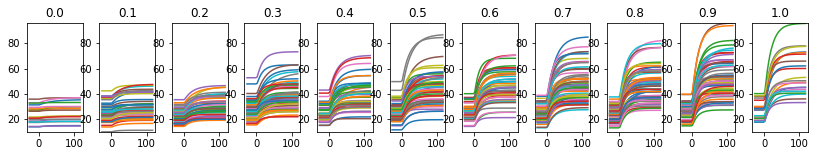

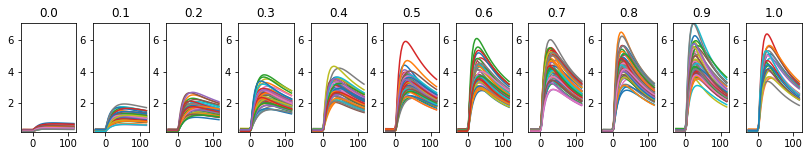

In [8]:
plot_all_doses(observed_data_in.copy(),time_data.copy(),dosage_data)  
plot_all_doses(observed_data_out.copy(),time_data.copy(),dosage_data)  

newcsvpath = repo + csvsavepath

if not os.path.exists(newcsvpath):
    os.makedirs(newcsvpath)
print(newcsvpath)
a = numpy.asarray(observed_data_in)
numpy.savetxt(newcsvpath+"smadMatrix_PYdat.csv", a, delimiter=",")
a = numpy.asarray(observed_data_out)
numpy.savetxt(newcsvpath+"outputMatrixDIFF_PYdat.csv", a, delimiter=",")
a = numpy.asarray(time_data)
numpy.savetxt(newcsvpath+"timeMatrix_PYdat.csv", a, delimiter=",")

In [9]:
 
print('observed_data_in', observed_data_in.shape)
print('observed_data_out', observed_data_out.shape)
print('time_data', time_data.shape)
ogdin = observed_data_in.copy()
ogdout = observed_data_out.copy()
tvec = time_data[1,:]
print(tvec)

tidx = ((tvec<0) & (tvec>=-30))
basal0 = np.where(tidx)
basal = basal0[0]
#compute fold change
for k in range(0,observed_data_in.shape[0]):  
    observed_data_in[k,:] = observed_data_in[k,:]/np.median(ogdin[k,basal])
    
#compute rate    
observed_data_in = np.gradient(observed_data_in,axis=1)


#compute difference for gene expression (snail)
for k in range(0,observed_data_out.shape[0]):  
    observed_data_out[k,:] = observed_data_out[k,:]-np.median(ogdout[k,basal])

#transform each trajectory to be scaled by the minimum and maximum of the population
inkeep = observed_data_in.copy()
for k in range(0,observed_data_in.shape[0]):  
    observed_data_in[k,:] = observed_data_in[k,:] - np.min(inkeep[:])
    observed_data_in[k,:] = observed_data_in[k,:] / (np.max(inkeep[:])-np.min(inkeep[:]))
 

#transform each trajectory to be scaled by the minimum and maximum of the populationz
outkeep = observed_data_out.copy()
for k in range(0,observed_data_out.shape[0]):   
    observed_data_out[k,:] = observed_data_out[k,:] - np.min(outkeep[:])
    observed_data_out[k,:] = observed_data_out[k,:] / (np.max(outkeep[:])-np.min(outkeep[:]))

    


def zero_one_individ(data):
    for k in range(0,data.shape[1]):   
        data[:,k] = data[:,k] - np.min(data[:,k])
        data[:,k] = data[:,k] / np.max(data[:,k])
    #     observed_data_in[:,k] = np.log(observed_data_in[:,k]+1e-0)
        data[:,k] = np.sqrt(data[:,k])
    return data

def zero_one_population(data):
    ogdingrad = data.copy()
    for k in range(0,data.shape[0]):  
        data[k,:] = data[k,:] - np.min(ogdingrad[:])
        data[k,:] = data[k,:] / (np.max(ogdingrad[:])-np.min(ogdingrad[:]))
    return data

def zero_one_dimension(data):
    ogdingrad = data.copy()
    for i in range(0,data.shape[1]):  
        dimdat = ogdingrad[:,i]
        for k in range(0,data.shape[0]):  
            data[k,i] = data[k,i] - np.min(dimdat[:])
            data[k,i] = data[k,i] / (np.max(dimdat[:])-np.min(dimdat[:]))
    return data

# datain = zero_one_dimension(observed_data_in)

datain = np.hstack([observed_data_in])
dataout = np.hstack([observed_data_out]) #hstack does horzcat in matlab, and in this case it does nothing
print(datain.shape)

observed_data_in (500, 41)
observed_data_out (500, 41)
time_data (500, 41)
[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018
   1.8018   5.4054   9.009   12.6126  16.2162  19.8198  23.4234  27.027
  30.6306  34.2342  37.8378  41.4414  45.045   48.6486  52.2522  55.8558
  59.4594  63.066   66.666   70.272   73.872   77.478   81.084   84.684
  88.29    91.89    95.496   99.102  102.702  106.308  109.908  113.514
 117.12  ]
(500, 41)


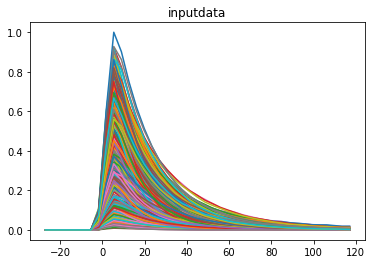

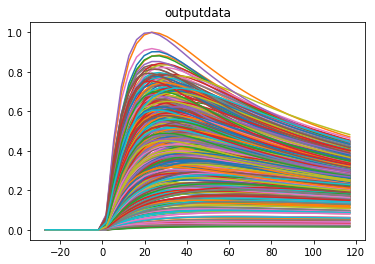

In [10]:
plt.plot(time_data.T,datain.T)
plt.title('inputdata')
plt.show()

plt.plot(time_data.T,dataout.T)
plt.title('outputdata')
plt.show()

In [11]:
##########################################################################################
def eigcut(evals,evecs,eps,cut):   
    eigen_val_in = np.exp(np.log(evals)/np.median(eps))
    eidx = np.where(eigen_val_in>cut)
    
    ff = eidx[0]
    if len(ff)<4:
        ff = [0,1,2,3,4,5]
#     plt.semilogy(eigen_val_in[0::],'r')
#     plt.show()
#     print(eidx)
#     ppo
    return ff
        
def inoutdmap(datain,dataout,epsfact):
    import sklearn.metrics as sm
    data = datain.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_in = np.median(dist_true)
    print('meddist_in',meddist_in)

    data = dataout.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_out = np.median(dist_true)
    print('meddist_out',meddist_out)
    print(dist_true.shape)
    ein = {}
    eout ={}
    numcut = {}
    numcutsmad={}
    numcutsnail={}
    for i in range(0,len(epsfact)):
    
        epsf = epsfact[i]
    
        # get input data dmaps
        data = datain.copy()
        data_type = "compute dmatrix"
        n_evecs = 25
        LB_flag = 1
#         epsilon = meddist_in*epsf

        epsilon = epsf
        #         print(epsilon)
        state_dependent_eps = True
        cutoff_num=-1
        estimate_eps = False
        verbose=False


        evecs_in,evals_in,_,_,_,eps_in  = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=verbose)

        ################################################################################
        # get output data dmaps
        data = dataout.copy()
#         epsilon = meddist_out*epsf
        epsilon = epsf



        evecs_out,evals_out,_,_,_,eps_out = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=verbose)


#         cut_in = (1*(10**(-14)))
#         eidx = eigcut(evals_in,evecs_in,eps_in,cut_in)
#         ein[i] = [evecs_in[:,eidx],evals_in[eidx],eps_in[eidx],1]
#         numcutsmad[i] = (evecs_in[:,eidx]).shape[1]
        
#         eidx = eigcut(evals_out,evecs_out,eps_out,cut_in)
#         eout[i] = [evecs_out[:,eidx],evals_out[eidx],eps_out[eidx],1]
#         numcutsnail[i] = (evecs_out[:,eidx]).shape[1]
        
        ein[i] = [evecs_in,evals_in,eps_in,1]
        eout[i] = [evecs_out,evals_out,eps_out,1]
        numcutsmad[i] = (evecs_in).shape[1]
        numcutsnail[i] = (evecs_out).shape[1]

        print('i=', str(i),end=" ")
    print('done')  
    numcut['smad']=numcutsmad
    numcut['snail']=numcutsnail
    return eout,ein,epsfact,numcut 

initializing diffusion map computation, data is a 500X41 matrix.
estimated epsilon: 0.20550792275662583
density median 0.7357184980218331
density min 0.2632746177613162
density max 0.81041085291307
epsilon 0.27932966974378126
sparsity: 0.998
starting diffusion map computation.
using LB approximation
using eigsh to find 100 eigenvectors
computed eigensystem in 0 seconds.
(500, 41)
initializing diffusion map computation, data is a 500X41 matrix.
estimated epsilon: 0.7369106556239012
density median 0.7394322902434021
density min 0.2729628901313874
density max 0.8017329545113289
epsilon 0.9965898008014057
sparsity: 0.998
starting diffusion map computation.
using LB approximation
using eigsh to find 100 eigenvectors
computed eigensystem in 0 seconds.
working on input


/Users/frick/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


10
good input dparams are: [1 3]
working on output
10
good output dparams are: [1]


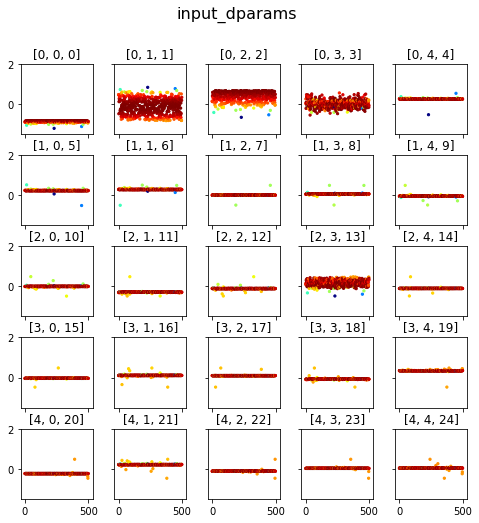

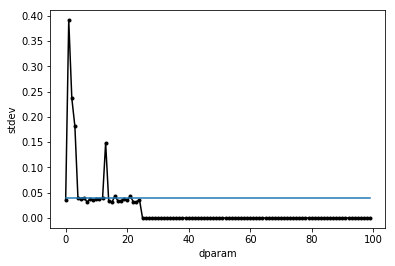

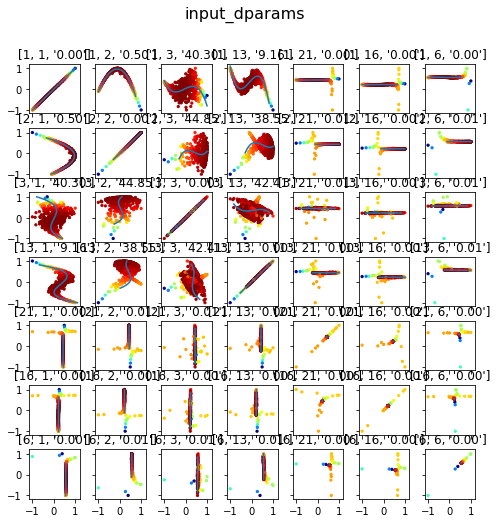

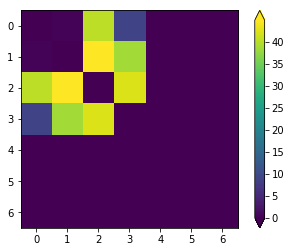

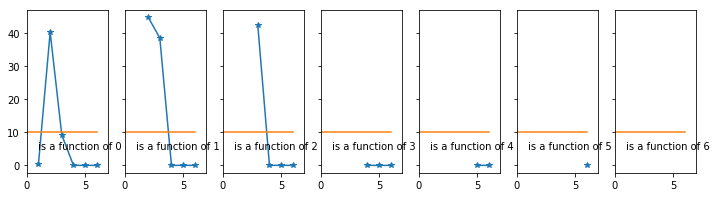

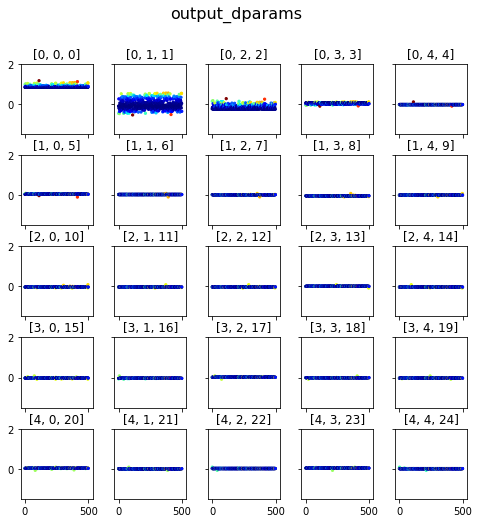

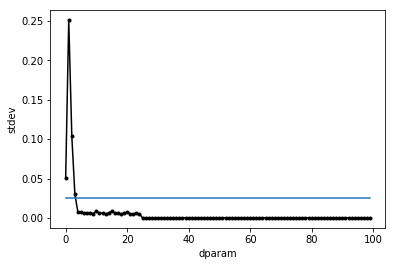

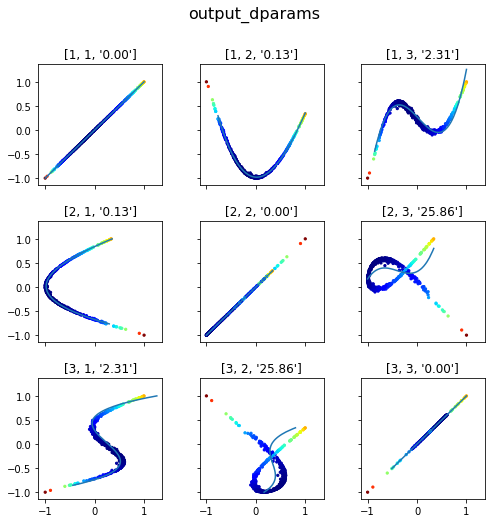

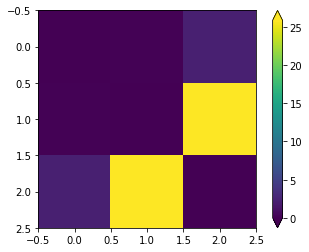

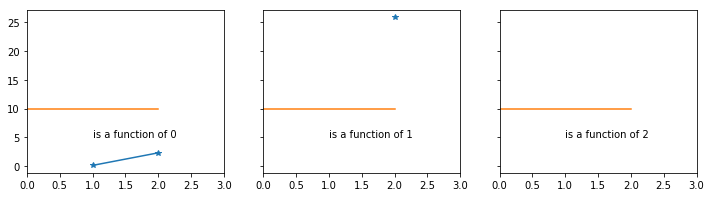

In [12]:
##########################################################################################
# get input data dmaps
data = datain.copy()

data_type = "compute dmatrix"
n_evecs = 100
LB_flag = 1
epsilon = 1
state_dependent_eps = True
cutoff_num=-1
estimate_eps = True


evecs_in,evals_in,_,_,_,eps_in  = dmap_sp(data,epsilon,
                                    n_evecs,LB_flag,data_type,
                                    estimate_eps=estimate_eps,
                                    cutoff_num=cutoff_num,
                                    state_dependent_eps=state_dependent_eps,verbose=True)

stdcut = 50

################################################################################
# get output data dmaps
data = dataout.copy()
print(data.shape)

data_type = "compute dmatrix"
n_evecs = 100
LB_flag = 1
epsilon = 1e-0
state_dependent_eps = True
cutoff_num=-1
estimate_eps = True


evecs_out,evals_out,_,_,_,eps_out = dmap_sp(data,epsilon,
                                    n_evecs,LB_flag,data_type,
                                    estimate_eps=estimate_eps,
                                    cutoff_num=cutoff_num,
                                    state_dependent_eps=state_dependent_eps,verbose=True)


stdcut = 10
taurcut = 10

goodinputs = autodparam(evecs_in,evals_in,eps_in,'input')

stdcut = 10
goodoutputs = autodparam(evecs_out,evals_out,eps_out,'output')

#choose important eigenvectors
ev_in = goodinputs.astype(int).copy() # important eigenvectors for input, determined visually from previous plots
ev_out = goodoutputs.astype(int).copy() # important eigenvectors for output, determined visually from previous plots

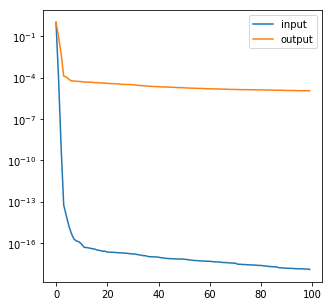

In [13]:
fig = plt.figure(figsize=(5,5))
eigen_val_in = np.exp(np.log(evals_in)/np.median(eps_in))
plt.semilogy(eigen_val_in[0::])
eigen_val_out = np.exp(np.log(evals_out)/np.median(eps_out))
plt.semilogy(eigen_val_out[0::])
plt.legend(['input','output'])


In [14]:
#choose important eigenvectors
ev_in = goodinputs.astype(int).copy() # important eigenvectors for input, determined visually from previous plots
# ev_in = ev_in[2]
ev_out = goodoutputs.astype(int).copy() # important eigenvectors for output, determined visually from previous plots
# ev_out = ev_out[1]
print("ev_in",ev_in)
print("ev_out",ev_out)

ev_in [1 3]
ev_out [1]


In [15]:
# evecs_out = evecs_out*-1
# evecs_in[:,1] = evecs_in[:,1]*-1
# evecs_in[:,4] = evecs_in[:,4]*-1
# evecs_out = 

In [24]:
#save these as CSV files so you don't have to run it again and again

savepath = str(cwd) + '/' + csvsavepath
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

    

a = numpy.asarray(evecs_in)
numpy.savetxt(savepath+"evecs_in.csv", a, delimiter=",")
a = numpy.asarray(evals_in)
numpy.savetxt(savepath+"evals_in.csv", a, delimiter=",")
a = numpy.asarray(ev_in)
numpy.savetxt(savepath+"ev_in.csv", a, delimiter=",")


a = numpy.asarray(evecs_out)
numpy.savetxt(savepath+"evecs_out.csv", a, delimiter=",")
a = numpy.asarray(evals_out)
numpy.savetxt(savepath+"evals_out.csv", a, delimiter=",")
a = numpy.asarray(ev_out)
numpy.savetxt(savepath+"ev_out.csv", a, delimiter=",")

a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_in.csv", a, delimiter=",")
a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_out.csv", a, delimiter=",")

/Users/frick/Dparams/DParamsFinal_v1/_dmap_csv_exphiddenvars_proteinvartcutmodel_med-LEV-tot-LEV_gpy_GRADIENT_pos2negcopyclean/


In [17]:
#load the CSV files
savepath = str(cwd) + '/' + csvsavepath

evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evecs_out_csv = np.genfromtxt(savepath+"evecs_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evals_out_csv = np.genfromtxt(savepath+"evals_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
eps_out_csv = np.genfromtxt(savepath+"eps_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
ev_out_csv = np.genfromtxt(savepath+"ev_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [18]:
evecs_in = evecs_in_csv
evecs_out = evecs_out_csv

evals_in = evals_in_csv
evals_out = evals_out_csv
ev_in = np.asarray(ev_in_csv,dtype='int').reshape(-1,)
ev_out = np.asarray(ev_out_csv,dtype='int').reshape(-1,)

eps_in = eps_in_csv
eps_out = eps_out_csv

In [19]:
print(evecs_out.shape)
# ev_0=ev_in
# ev_out = [1,11]
# ev_in=[1,3]
# ev_out=[1]
# plot_trajectories_based_on_dparam(t0,in1,evecs_in,ev_in,'input')
# plot_trajectories_based_on_dparam(t0,out1,evecs_out,ev_out,'output')

(500, 100)


In [22]:
# evecs_in[:,ev_in[0]] = evecs_in[:,ev_in[0]]*-1
evecs_in = evecs_in*-1
evecs_out[:,ev_out[0]] = evecs_out[:,ev_out[0]]*-1

(500, 100)
ev_in [1 3]
ev_out [1]


/Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:295: RuntimeWarning: divide by zero encountered in true_divide
/Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:295: RuntimeWarning: invalid value encountered in true_divide


done


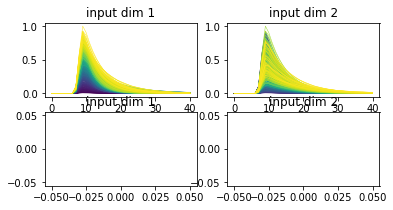

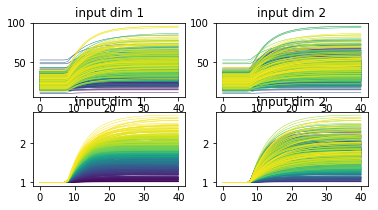

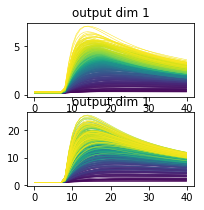

In [23]:
print(evecs_out.shape)
# ev_0=ev_in
# ev_out = [1,11]
# ev_in=[1]
# ev_out=[1,6]
# plot_trajectories_based_on_dparam(t0,in1,evecs_in,ev_in,'input')
# plot_trajectories_based_on_dparam(t0,out1,evecs_out,ev_out,'output')


# plt.plot(time_in.T,observed_data_in.T)    
# plt.show()
# plt.plot(time_out.T,observed_data_out.T)
# plt.show()
# plot_trajectories_based_on_dparam(time_in,in3,evecs_in,ev_in,'input')
print('ev_in',ev_in)
print('ev_out',ev_out)
plot_trajectories_based_on_dparam(time_data,observed_data_in,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdin,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdout,evecs_out,ev_out,'output')
# plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
print('done')
# evecs_out[]

In [25]:
### quantify the accuracy of diffusion map coordinates (knn) relative to traces at random
#validate accuracy (test2), using evecs only in 3d
def accuracytester7(listcomb,evecs_in,k,ploton,testvec,smadsnail,seedval,datatrajectories):

    
#     distmetric = 'mahalanobis'
    distmetric = 'euclidean'
    from time import time
    lt=time()
    data = datatrajectories
    dvec = data[1,:]

#     import sklearn.metrics as sm
    
    numpy.random.seed(seed=None)
    distMatrix = scipy.spatial.distance.pdist(data, distmetric)
    distMatrix = scipy.spatial.distance.squareform(distMatrix)
    dist_true = distMatrix.copy()
#     dist_true = sm.pairwise_distances(data,metric = distmetric)
    sort_dist_true = np.sort(dist_true,axis=1)
    arg_dist_true = np.argsort(dist_true,axis=1)

    closestbest = arg_dist_true[:,1:k+1]
    distbest = sort_dist_true[:,1:k+1]
    nbsbest = closestbest[0]


    kout_in1i = np.zeros(len(listcomb))
    koutDPrnd_in1i = np.zeros(len(listcomb))
    koutDPbest_in1i = np.zeros(len(listcomb))
    for i in range(len(listcomb)):
        tmat = listcomb[i]    
        xyz=evecs_in[:,tmat]

#         dist = sm.pairwise_distances(xyz,metric = distmetric)
#         distmetric = 'euclidean'
        distMatrix = scipy.spatial.distance.pdist(xyz, distmetric)
        distMatrix = scipy.spatial.distance.squareform(distMatrix)
        dist = distMatrix.copy()
        arg_dist = np.argsort(dist)
        closest = arg_dist[:,1:k+1]
        
    
        kvecsum = np.zeros(data.shape[0])
        kvecsumrnd = np.zeros(data.shape[0])
        kvecsumbest = np.zeros(data.shape[0])
        numpy.random.seed(seed=None)
        for j in range(data.shape[0]):
            #find knn in 49, compute distance in 49 dim space
            #find knn in DMap, compute distance in 49 dim space

            cp1 = j
            dmap_knn = closest[cp1,0:k]
            ndim_knn = closestbest[cp1,0:k]
            rand_knn = np.random.randint(0,data.shape[0],k);

            dmap_dist = dist_true[cp1,dmap_knn]
            ndim_dist = dist_true[cp1,ndim_knn]
            rand_dist = dist_true[cp1,rand_knn]

            kvecsum[j] = np.sum(dmap_dist)
            kvecsumrnd[j] = np.sum(rand_dist)
            kvecsumbest[j] = np.sum(ndim_dist)

        kout_in1i[i] = np.sum(kvecsum)
        koutDPrnd_in1i[i] = np.sum(kvecsumrnd)
        koutDPbest_in1i[i] = np.sum(kvecsumbest)
        
        if((time()-lt)>5):
            lt = time()
#             print(np.round((i/len(listcomb))*100))
#             print(np.round((i/len(listcomb))*100), end='\r')

#     print('done')
        
    return kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

In [26]:

def accbar1(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    listcomb = [[x,x] for x in range(evecs_test.shape[1])]
    shave_i = evecs_test
    testvec = [0,1]

    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)

        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i



def accbar2(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
#     listcomb = [[x,x] for x in range(evecs_test.shape[1])]
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    shave_i = evecs_test
    testvec = [0,1]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar3(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),3)
    listcomb = list(comb)
    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar1_2(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = goodin[0]
        t2 = int(tmat[0])
        ev_i = [t1,t2]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar12_3(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(goodin[0])
        t2 = int(goodin[1])
        t3 = int(tmat[0])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar123_4(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(goodin[0])
        t2 = int(goodin[1])
        t3 = int(goodin[2])
        t4 = int(tmat[0])
        ev_i = [t1,t2,t3,t4]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2,3]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail):

    ev_i = [int(x) for x in goodin]
    listcomb = [ev_i]

    shave_i = evecs_test
    testvec = [int(x) for x in range(0,len(goodin))]
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i


def accbar3_21(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(1)
        t2 = int(tmat[0])
        t3 = int(tmat[1])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i
def accbar3_21(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(1)
        t2 = int(tmat[0])
        t3 = int(tmat[1])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i


def accbar1plot(kout_in1i,koutDPbest_in1i,koutDPrnd_in1i,listcomb1,smadsnail):
    #determine accuracy of DParams (1 param)
    ratiovec = np.reciprocal(kout_in1i)/np.reciprocal(koutDPbest_in1i)
    # plt.plot(ratiovec)

    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)
    newin = -1

    vv = listcomb1[newarg[newin]]

    top5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [-5,-4,-3,-2,-1]])
    bot5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [0,1,2,3,4]])
    top5val = [ratiosort[newin] for newin in [-5,-4,-3,-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1,2,3,4]]

    xticks = np.hstack([bot5,top5])

    fig = plt.figure(figsize=(3,3))
    plt.bar(range(10),np.hstack([bot5val,top5val]))

    fsize=12
    plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
    plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
    plt.ylabel('accuracy',fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.ylim(0,1)
    plt.show()
    print(top5val[-1])
    return top5val[-1],top5[-1]

    
def accbar2plot(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)


    newin = -1

    vv = listcomb2[newarg[newin]]

    top5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [-5,-4,-3,-2,-1]])
    bot5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [0,1,2,3,4]])
    top5val = [ratiosort[newin] for newin in [-5,-4,-3,-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1,2,3,4]]

    xticks = np.hstack([bot5,top5])

    fig = plt.figure(figsize=(3,3))
    plt.bar(range(10),np.hstack([bot5val,top5val]))

    fsize=12
    plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
    plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
    plt.ylabel('accuracy',fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.ylim(0,1)
    plt.show()
    print(top5val[-1])
    return top5val[-1],top5[-1]

def accbar1get(kout_in1i,koutDPbest_in1i,koutDPrnd_in1i,listcomb1,smadsnail):
    #determine accuracy of DParams (1 param)
    ratiovec = np.reciprocal(kout_in1i)/np.reciprocal(koutDPbest_in1i)
    # plt.plot(ratiovec)

    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)
    newin = -1

    vv = listcomb1[newarg[newin]]

    top5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [-2,-1]])
    bot5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [0,1]])
    top5val = [ratiosort[newin] for newin in [-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1]]

    xticks = np.hstack([bot5,top5])

#     fig = plt.figure(figsize=(3,3))
#     plt.bar(range(10),np.hstack([bot5val,top5val]))

#     fsize=12
#     plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
#     plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
#     plt.ylabel('accuracy',fontsize=fsize)
#     plt.yticks(fontsize=fsize)
#     plt.ylim(0,1)
#     plt.show()
#     print(top5val[-1])
    return top5val[-1],listcomb1[newarg[-1]]

def accbar2get(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)


    newin = -1

    vv = listcomb2[newarg[newin]]

    top5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [-2,-1]])
    bot5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [0,1]])
    top5val = [ratiosort[newin] for newin in [-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1]]

    xticks = np.hstack([bot5,top5])
    top5array = listcomb2[newarg[-1]]
#     fig = plt.figure(figsize=(3,3))
#     plt.bar(range(10),np.hstack([bot5val,top5val]))

#     fsize=12
#     plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
#     plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
#     plt.ylabel('accuracy',fontsize=fsize)
#     plt.yticks(fontsize=fsize)
#     plt.ylim(0,1)
#     plt.show()
#     print(top5val[-1])
    return top5val[-1],listcomb2[newarg[-1]]

def accbar_multiGET(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    return ratiosort[-1]


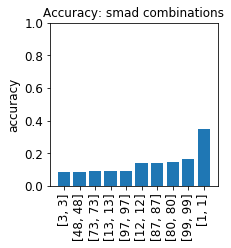

0.3486874841525159


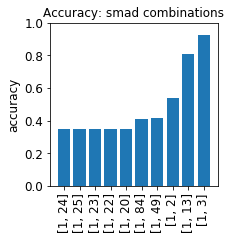

0.9261135228783552


(0.9261135228783552, '[1, 3]')

In [27]:
#try a new method where you compute dimensionality using LLR (local linear regression)


     
k=5
ev_i = [0,1]
seedval =16
evecs_test = shaver(evecs_in,evals_in,eps_in) 
datatest = observed_data_in
smadsnail = 'smad'
lcin1, kin1, krndin1, kinbest1 = accbar1(k,datatest,evecs_test,smadsnail)
lcin2, kin2, krndin2, kinbest2 = accbar1_2(k,[1],datatest,evecs_test,smadsnail)
accbar1plot(kin1,kinbest1,krndin1,lcin1,smadsnail)
accbar1plot(kin2,kinbest2,krndin2,lcin2,smadsnail)



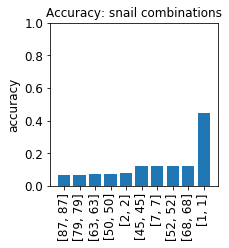

0.4484542894910061


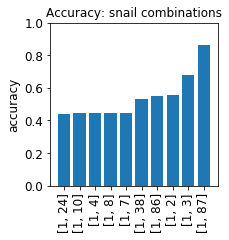

0.8648112629791075


(0.8648112629791075, '[1, 87]')

In [28]:
#try a new method where you compute dimensionality using LLR (local linear regression)


     
    k=5
    ev_i = [0,1]
    seedval =16
    evecs_test = shaver(evecs_out,evals_out,eps_out)  
    datatest = observed_data_out
    smadsnail = 'snail'
    lcin1o, kin1o, krndin1o, kinbest1o = accbar1(k,datatest,evecs_test,smadsnail)
    lcin2o, kin2o, krndin2o, kinbest2o = accbar1_2(k,[1],datatest,evecs_test,smadsnail)
    accbar1plot(kin1o,kinbest1o,krndin1o,lcin1o,smadsnail)
    accbar1plot(kin2o,kinbest2o,krndin2o,lcin2o,smadsnail)



[1 3]


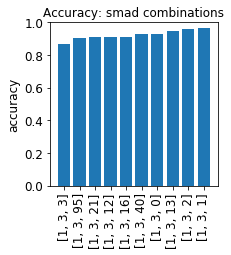

0.9664008085875475


(0.9664008085875475, '[1, 3, 1]')

In [29]:
#try a new method where you compute dimensionality using LLR (local linear regression)


     
    k=5
    ev_i = [0,1]
    seedval =16
    evecs_test = shaver(evecs_in,evals_in,eps_in)  
#     evecs_test = evecs_out
    datatest = observed_data_in
    smadsnail = 'smad'
    goodin = np.asarray([int(x) for x in [1,3]]).reshape(-1,)
    print(goodin)
#     lcin1oo, kin1oo, krndin1oo, kinbest1oo = accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail)
    lcin1io, kin1io, krndin1io, kinbest1io = accbar12_3(k,goodin,datatest,evecs_test,smadsnail)
#     lcin2o, kin2o, krndin2o, kinbest2o = accbar1_2(k,[1],datatest,evecs_test,smadsnail)
#     accbar1plot(kin1o,kinbest1o,krndin1o,lcin1o,smadsnail)
    accbar2plot(kin1io,kinbest1io,krndin1io,lcin1io,smadsnail)



[1 3]


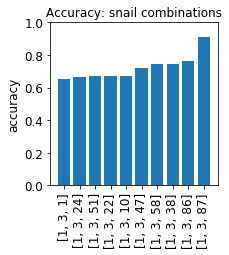

0.9109454525825892


(0.9109454525825892, '[1, 3, 87]')

In [30]:
#try a new method where you compute dimensionality using LLR (local linear regression)


     
    k=5
    ev_i = [0,1]
    seedval =16
    evecs_test = shaver(evecs_out,evals_out,eps_out)  
#     evecs_test = evecs_out
    datatest = observed_data_out
    smadsnail = 'snail'
    goodin = np.asarray([int(x) for x in [1,3]]).reshape(-1,)
    print(goodin)
#     lcin1oo, kin1oo, krndin1oo, kinbest1oo = accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail)
    lcin1oo, kin1oo, krndin1oo, kinbest1oo = accbar12_3(k,goodin,datatest,evecs_test,smadsnail)
#     lcin2o, kin2o, krndin2o, kinbest2o = accbar1_2(k,[1],datatest,evecs_test,smadsnail)
#     accbar1plot(kin1o,kinbest1o,krndin1o,lcin1o,smadsnail)
    accbar2plot(kin1oo,kinbest1oo,krndin1oo,lcin1oo,smadsnail)



In [31]:


# from dmap_sp_chrisNEW import compute_residualsNEW
import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
from dmap_sp_chrisNEW import compute_residualsNEW
scalevec = np.logspace(np.log10(1.5),np.log10(6),6)
scalevec=[3]

idx = np.asarray(range(0,90)).reshape(-1,)
evecs_test = evecs_in[:,idx]
print('evecs_shape',evecs_test.shape)
print(eps_in.shape)
rrr = np.zeros(evecs_test.shape[1])
print(evecs_test.shape[1])
ressy1 = np.zeros((len(scalevec),evecs_test.shape[1]))
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr0 = compute_residualsNEW(evecs_test, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
    rrr = rrr0['Residuals']
    ressy1[int(cycle),0:(evecs_test.shape[1])]=rrr
    print(cycle,end=" ")
print('done')



evecs_test = evecs_out[:,idx]
print('evecs_shape',evecs_test.shape)
print(eps_in.shape)
rrr = np.zeros(evecs_test.shape[1])
print(evecs_test.shape[1])
# scalevec = np.logspace(np.log10(0.1),np.log10(10),11)
ressy2 = np.zeros((len(scalevec),evecs_test.shape[1]))
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
#     print(evecs_out.shape[1])
    rrr0 = compute_residualsNEW(evecs_test, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
    rrr = rrr0['Residuals']
    ressy2[int(cycle),0:(evecs_test.shape[1])]=rrr
    print(cycle,end=" ")
print('done')

evecs_shape (500, 90)
(500,)
90
0 done
evecs_shape (500, 90)
(500,)
90
0 done


[1. 3.]


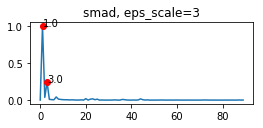

[1. 6.]


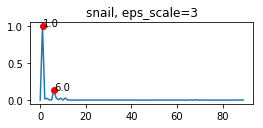

In [32]:
#eps_scale of 3 , cutoff of 0.05
#eps_scale of 6 is best when more n_evecs are considered
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr = ressy1[int(cycle),:]
#     print(np.argsort(rrr))
    plt.figure(figsize=(4,1.5))
    plt.plot(rrr)
    ridx = rrr>0.05
    x = np.linspace(0,len(rrr)-1,len(rrr))

    plt.plot(x[ridx],rrr[ridx],'ro')
#     plt.plot(ev_in,rrr[ev_in],'ro')
    plt.title('smad, eps_scale=' + str(np.round(i,2)))
    rridx0 = np.where(ridx==True)
    rridx = list(rridx0[0])
    for h in rridx:
        tx= x[h]
        ty = rrr[h]
        ts = str(np.round(ty,2))
        t = plt.text(tx,ty,tx)
print(x[ridx])
plt.show()

    
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr = ressy2[int(cycle),:]
    plt.figure(figsize=(4,1.5))
    plt.plot(rrr)
    ridx = rrr>0.05
    x = np.linspace(0,len(rrr)-1,len(rrr))

    plt.plot(x[ridx],rrr[ridx],'ro')
    plt.title('snail, eps_scale=' + str(np.round(i,2)))
    rridx0 = np.where(ridx==True)
    rridx = list(rridx0[0])
    for h in rridx:
        tx= x[h]
        ty = rrr[h]
        ts = str(np.round(ty,2))
        t = plt.text(tx,ty,tx)
print(x[ridx])
plt.show()

    

In [33]:
print(evecs_out.shape)
# ev_0=ev_in
# ev_out = [1,11]
ev_in=[1,2,3]
ev_out=[1,6,87]
# plot_trajectories_based_on_dparam(t0,in1,evecs_in,ev_in,'input')
# plot_trajectories_based_on_dparam(t0,out1,evecs_out,ev_out,'output')

(500, 100)


(500, 100)
ev_in [1, 2, 3]
ev_out [1, 6, 87]


/Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:295: RuntimeWarning: divide by zero encountered in true_divide
/Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:295: RuntimeWarning: invalid value encountered in true_divide


done


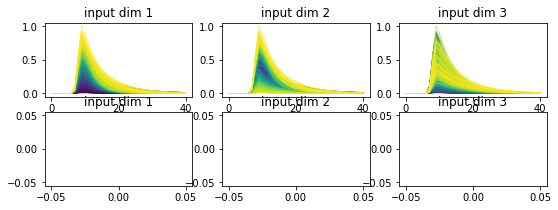

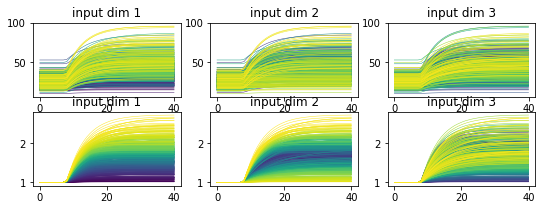

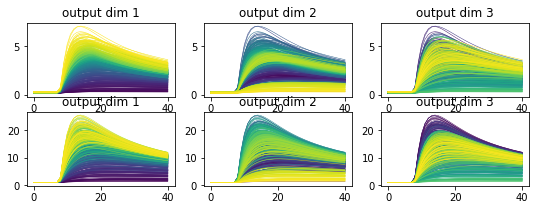

In [34]:
print(evecs_out.shape)
# ev_0=ev_in
# ev_out = [1,11]
# ev_in=[1]
# ev_out=[1,6]
# plot_trajectories_based_on_dparam(t0,in1,evecs_in,ev_in,'input')
# plot_trajectories_based_on_dparam(t0,out1,evecs_out,ev_out,'output')


# plt.plot(time_in.T,observed_data_in.T)    
# plt.show()
# plt.plot(time_out.T,observed_data_out.T)
# plt.show()
# plot_trajectories_based_on_dparam(time_in,in3,evecs_in,ev_in,'input')
print('ev_in',ev_in)
print('ev_out',ev_out)
plot_trajectories_based_on_dparam(time_data,observed_data_in,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdin,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdout,evecs_out,ev_out,'output')
# plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
print('done')
# evecs_out[]

[1 4]


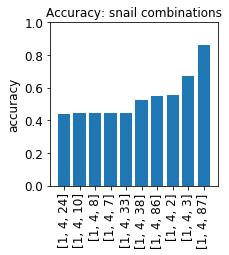

0.8593884735282027


(0.8593884735282027, '[1, 4, 87]')

In [35]:
#try a new method where you compute dimensionality using LLR (local linear regression)


     
    k=5
    ev_i = [0,1]
    seedval =16
    evecs_test = shaver(evecs_out,evals_out,eps_out)  
#     evecs_test = evecs_out
    datatest = observed_data_out
    smadsnail = 'snail'
    goodin = np.asarray([int(x) for x in [1,4]]).reshape(-1,)
    print(goodin)
#     lcin1oo, kin1oo, krndin1oo, kinbest1oo = accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail)
    lcin1oo, kin1oo, krndin1oo, kinbest1oo = accbar12_3(k,goodin,datatest,evecs_test,smadsnail)
#     lcin2o, kin2o, krndin2o, kinbest2o = accbar1_2(k,[1],datatest,evecs_test,smadsnail)
#     accbar1plot(kin1o,kinbest1o,krndin1o,lcin1o,smadsnail)
    accbar2plot(kin1oo,kinbest1oo,krndin1oo,lcin1oo,smadsnail)



# return to the orignailly determined coordinates of [1,3] and [1]

In [36]:
ev_in=[1,3]
ev_out=[1,1]

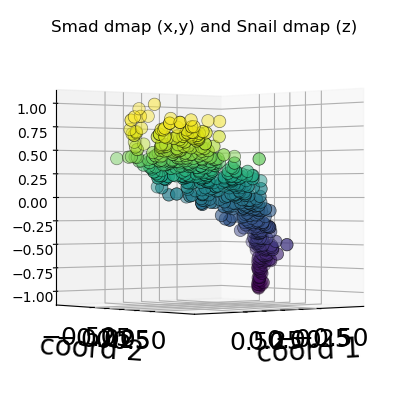

/Users/frick/Dparams/DParamsFinal_v1/2d-manifold_exphiddenvars_proteinvartcut/ snailC 3d man.png
done


In [56]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
x = evecs_in[:,ev_in[0]].copy()
y = evecs_in[:,ev_in[1]].copy()
cc = evecs_out[:,ev_out[0]].copy()
z = cc.copy()
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0
# csort = range(len(cc))
xx = x[csort]
yy = y[csort]
zz = z[csort]

xtickvec = np.linspace(-1,1,5)
ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.title('Smad dmap (x,y) and Snail dmap (z)')
savestr = savepath+' snailC 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
ax.view_init(-0,-310)
plt.show()

print(savestr)
print('done')

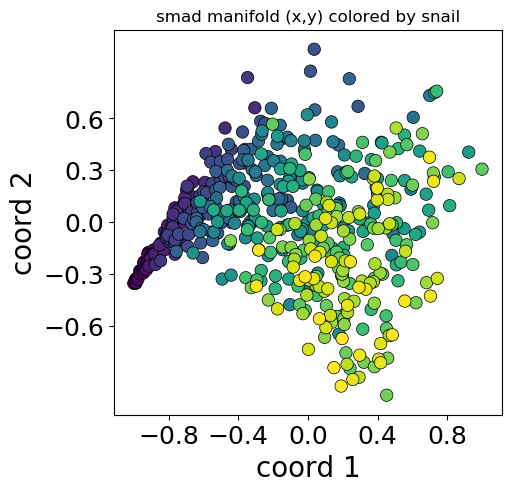

/Users/frick/Dparams/DParamsFinal_v1/2d-manifold_exphiddenvars_proteinvartcut/ smad manifold colored by snail.png
done


In [57]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)


ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.title('smad manifold (x,y) colored by snail')

xtickvec= np.linspace(-1.6,1.6,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
xtickvec= np.linspace(-1.2,1.2,5)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smad manifold colored by snail.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

# first attempt to use the original DMAPS [1,3] and [1] using GPy

In [58]:
ev_in = [1,3]
ev_out = [1]

In [59]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [70]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
if len(ev_in)==1:
    X = evecs_in[:,ev_in].reshape(-1,1)


Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

(500, 1)


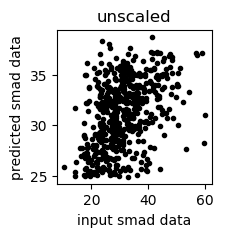

mse =  33.15114433694001


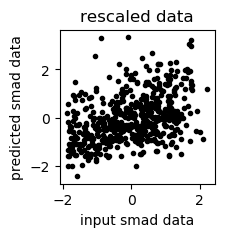

rescaled mse =  1.20246231104241
{0: 1.20246231104241}


In [71]:
#boom, we can predict input data well
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [72]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)

    
    x1,y1, mse, mseeach = msefunc(xp,Y)
    for i in range(0,x1.shape[1]):
        fig = plt.figure(figsize=(2,2))
        plt.scatter(x1[:,i],y1[:,i],c='k',marker='.')
        plt.xlabel('orig.' + outputstr)
        plt.ylabel('pred.' + outputstr)
        plt.title('predict ' + outputstr + ' based on ' + inputstr + ', rescaled')
        plt.show()
        print('rescaled mse = ',mse)
        print(mseeach.values())
    return mseeach

In [73]:
msekeeper={}

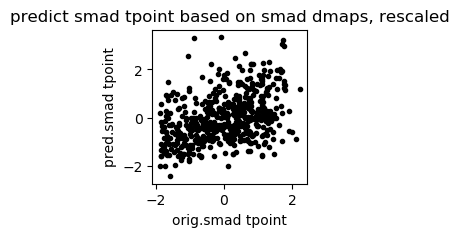

rescaled mse =  1.20246231104241
dict_values([1.20246231104241])


In [74]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)
# sample inputs and outputs
inputstr = 'smad dmaps'
outputstr = 'smad tpoint'
X = evecs_in[:,ev_in]
Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach

[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


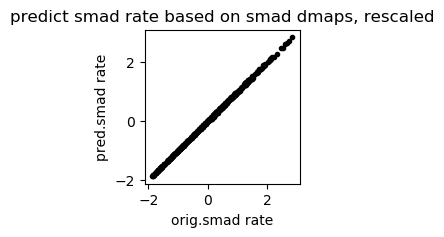

rescaled mse =  0.0002506738785174879
dict_values([0.0002506738785174879])


In [75]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad rate'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
rate=np.zeros(ogdin.shape[0])
for j in range(ogdin.shape[0]):
    rate[j] = np.max(ogdin[j,:]/np.median(ogdin[j,basal]))

X = evecs_in[:,ev_in]
Y = rate.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


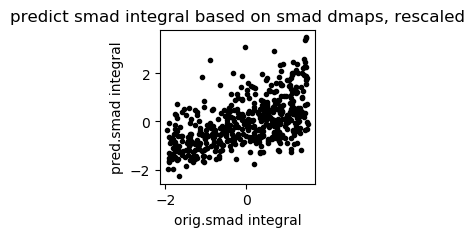

rescaled mse =  0.895991780647394
dict_values([0.895991780647394])


In [76]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad integral'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
rate=np.zeros(ogdin.shape[0])
for j in range(ogdin.shape[0]):
    rate[j] = np.max(np.cumsum(ogdin[j,:]))

X = evecs_in[:,ev_in]
Y = rate.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


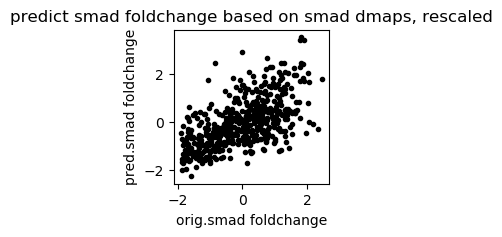

rescaled mse =  0.8049879247019562
dict_values([0.8049879247019562])


In [77]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad foldchange'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
foldchange = ogdin[:,peak]/np.median(ogdin[:,basal])

X = evecs_in[:,ev_in]
Y = foldchange.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


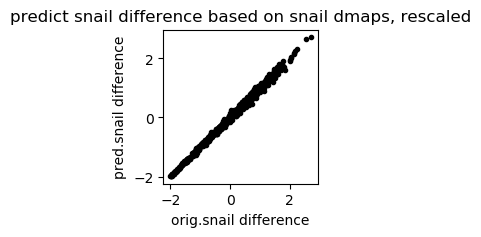

rescaled mse =  0.005534237936685435
dict_values([0.005534237936685435])


In [78]:

#use Smad Manifold to predicut Snail difference (fold change at 1 timepoint)
inputstr = 'snail dmaps'
outputstr = 'snail difference'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
snaildiff = ogdout[:,peak]-np.median(ogdout[:,basal])

X = evecs_out[:,ev_out]
Y = snaildiff.reshape(-1,1) #reshape to look like a 2d input

# plt.hist(snaildiff[dosage_data>0],density=True)
# plt.hist(snaildiff[dosage_data<0.5],density=True)
# plt.hist(snaildiff[dosage_data>0.5],density=True)
# plt.show()
max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
# msekeeper[outputstr]=mseeach


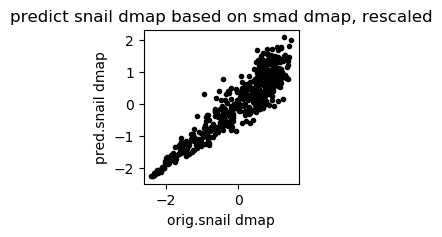

rescaled mse =  0.14543893429618318
dict_values([0.14543893429618318])


In [79]:
#attempt to predict output DMAP using input Dmaps
# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = evecs_out[:,ev_out]


inputstr = 'smad dmap'
outputstr = 'snail dmap'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


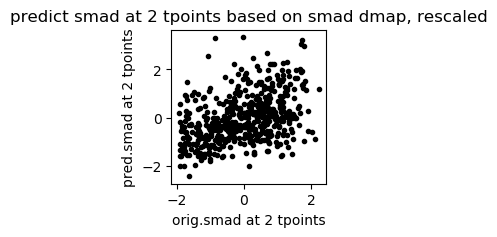

rescaled mse =  0.9598550774902075
dict_values([1.2009578486576573, 0.7187523063227579])


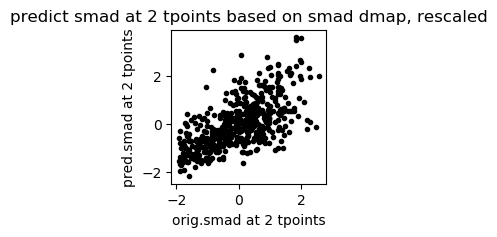

rescaled mse =  0.9598550774902075
dict_values([1.2009578486576573, 0.7187523063227579])


In [80]:
#attempt to predict input data at two timepoints using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = ogdin[:,[10,20]]


inputstr = 'smad dmap'
outputstr = 'smad at 2 tpoints'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach

In [81]:
def Gpy_eachtpoint(X,Yin0,samp_vec,messages,max_f_eval,inputstr,outputstr):
    Yin = Yin0[:,samp_vec]
    msearray = np.zeros(Yin.shape[1])
    for j in range(0,Yin.shape[1]):
        Y = Yin[:,j].reshape(-1,1)

        max_f_eval = 1000
        messages=False
        m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)

        xp,xstd = m.predict(X)
        x = Y
        y = xp
        x1,y1, mse, mseeach = msefunc(xp,Y)
        msearray[j]=mse
        print(j, end=" " )
    print('completed' + inputstr + outputstr)
    return msearray


In [82]:
msecombo={} #initialize the master msecombo

time_vec = time_data[1,:]
tsample = 3
tsamp = np.min([tsample,len(time_vec)])

print(len(time_vec))

axfact = 5
ax1 = np.ceil(len(time_vec)/2) - np.ceil(len(time_vec)/5)
ax2 = np.ceil(len(time_vec)/2) + np.ceil(len(time_vec)/5)
samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
print(samp_vec)
print(time_vec[samp_vec])

41
[12 21 30]
[16.2162 48.6486 81.084 ]


In [83]:
#attempt to predict input data at all timepoints using Smad Dmaps


inputstr = 'smad dmap'
outputstr = 'smad at each tpoint'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Yin = ogdin
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

inputstr = 'smad dmap'
outputstr = 'snail at each tpoint'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Yin = ogdout
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'f(smad)'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.0 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'f(smad_processed)'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = observed_data_in.copy()
mu, sigma = 0, 0.0 # mean and standard deviation
for j in range(0,observed_data_in.shape[1]):
    s = np.random.normal(mu, sigma, observed_data_in.shape[0])
    Z[:,j] = (observed_data_in[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapsmad at each tpoint
0 1 2 completedsmad dmapsnail at each tpoint
0 1 2 completedsmad dmapf(smad)
0 1 2 completedsmad dmapf(smad_processed)


In [84]:
inputstr = 'smad dmap'
outputstr = 'f(smad)+smallnoise'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.01 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapf(smad)+smallnoise


In [85]:
inputstr = 'smad dmap'
outputstr = 'f(smad)+mediumnoise'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.05 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'noise only'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 1 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapf(smad)+mediumnoise
0 1 2 completedsmad dmapnoise only


In [86]:
# d = {'a': 1, 'b': 2, 'c': 3}
print(msecombo.keys())
tvec = time_data[1,samp_vec]/60

def msecomboplotter(tvec,msecombo):
    plt.figure(figsize=(9,5))
    subkeep={}
    for k in msecombo.keys():
        v = msecombo[k]
      # k is now the key
      # v is the value
        subkeep[k]=v
        plt.semilogy(tvec,v,'*-', label=k)
        
#     plt.ylim(0.001,3)
    plt.ylabel('mean square error')
    plt.xlabel('time point, value')
    plt.title('error for different predictions based on Smad manifold') 
    plt.legend()
    plt.show()
        


dict_keys(['smad at each tpoint', 'snail at each tpoint', 'f(smad)', 'f(smad_processed)', 'f(smad)+smallnoise', 'f(smad)+mediumnoise', 'noise only'])


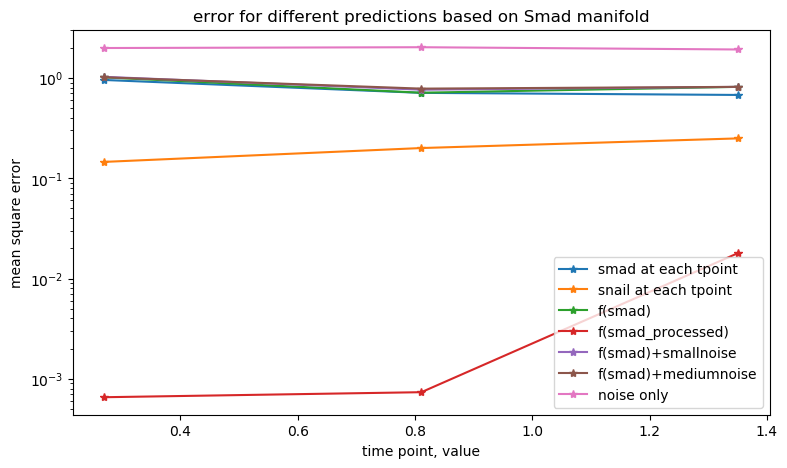

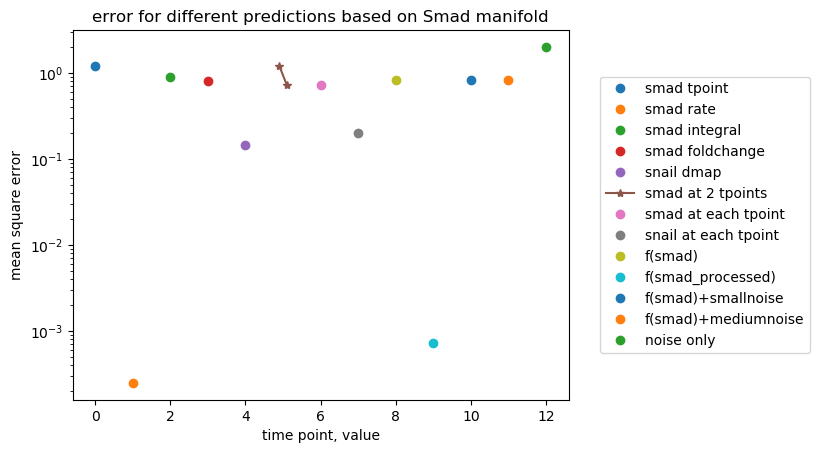

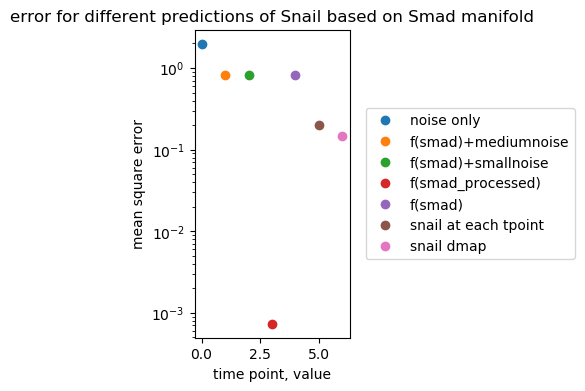

In [87]:
msecomboplotter(tvec,msecombo)
msekeeper2 = msekeeper
cycle=-1
for k in msecombo.keys():
    y={}
    cycle=cycle+1
    v = msecombo[k]
    y[cycle] = np.median(v)
    msekeeper2[k] = y

cycle=-1
for k in msekeeper2.keys():
    cycle=cycle+1
    v = msekeeper2[k]
  # k is now the key
  # v is the value
    y = v.values()
    if len(y)==1:
        x = cycle
        markerstr='o'
    else:
        x = np.linspace(cycle-0.1,cycle+0.1,len(y))
        markerstr='*-'
    plt.semilogy(x,y,markerstr, label=k)
    
# plt.ylim(0.01,1)
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for different predictions based on Smad manifold') 
plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()
    
plt.figure(figsize=(2,4))
names2 = list(msekeeper2.keys())
namestouse = [names2[x] for x in [2,5,8,9]]
namestouse = [names2[x] for x in [-1,-2,-3,-4,-5,-6,-9]]
cycle=-1
for k in namestouse:
    cycle=cycle+1
    v = msekeeper2[k]
  # k is now the key
  # v is the value
    y = v.values()
    if len(y)==1:
        x = cycle
        markerstr='o'
    else:
        x = np.linspace(cycle-0.1,cycle+0.1,len(y))
        markerstr='*-'
    plt.semilogy(x,y,markerstr, label=k)
    
# plt.ylim(0.01,2)
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for different predictions of Snail based on Smad manifold') 
plt.legend(loc='right',bbox_to_anchor=(2.5, 0.5))
plt.show()
    
    

# Now attempt to use the new DMAPS [1,2,3] and [1,4,7] using GPy

In [88]:
ev_in = [1,2,3]
ev_out = [1,4,7]

In [89]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [90]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
if len(ev_in)==1:
    X = evecs_in[:,ev_in].reshape(-1,1)


Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

(500, 1)


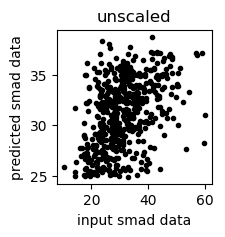

mse =  33.16072403463713


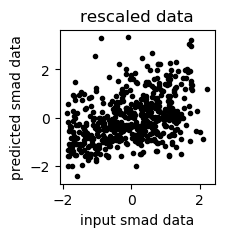

rescaled mse =  1.202517718939645
{0: 1.202517718939645}


In [91]:
#boom, we can predict input data well
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [92]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)

    
    x1,y1, mse, mseeach = msefunc(xp,Y)
    for i in range(0,x1.shape[1]):
        fig = plt.figure(figsize=(2,2))
        plt.scatter(x1[:,i],y1[:,i],c='k',marker='.')
        plt.xlabel('orig.' + outputstr)
        plt.ylabel('pred.' + outputstr)
        plt.title('predict ' + outputstr + ' based on ' + inputstr + ', rescaled')
        plt.show()
        print('rescaled mse = ',mse)
        print(mseeach.values())
    return mseeach

In [93]:
msekeeper={}

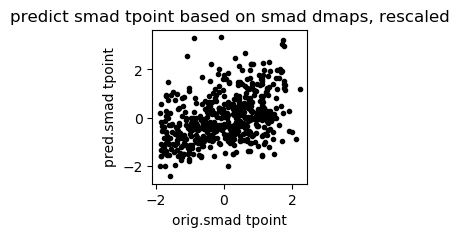

rescaled mse =  1.202517718939645
dict_values([1.202517718939645])


In [94]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)
# sample inputs and outputs
inputstr = 'smad dmaps'
outputstr = 'smad tpoint'
X = evecs_in[:,ev_in]
Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach

[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


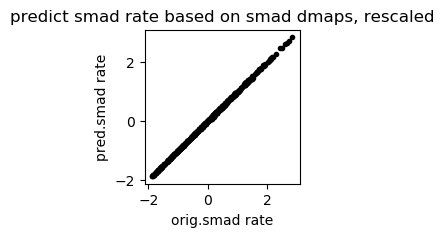

rescaled mse =  0.0002527905254206022
dict_values([0.0002527905254206022])


In [95]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad rate'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
rate=np.zeros(ogdin.shape[0])
for j in range(ogdin.shape[0]):
    rate[j] = np.max(ogdin[j,:]/np.median(ogdin[j,basal]))

X = evecs_in[:,ev_in]
Y = rate.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


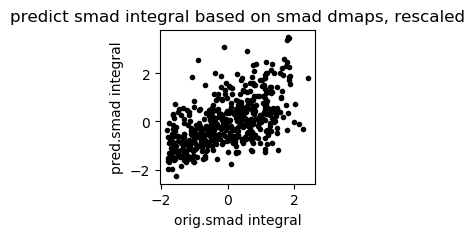

rescaled mse =  0.8816701372666628
dict_values([0.8816701372666628])


In [96]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad integral'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
rate=np.zeros(ogdin.shape[0])
for j in range(ogdin.shape[0]):
    rate[j] = np.max(np.cumsum(ogdin[j,:]))

X = evecs_in[:,ev_in]
Y = rate.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


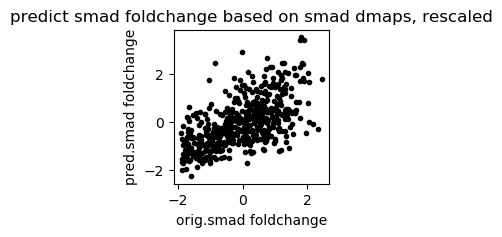

rescaled mse =  0.8046790211737455
dict_values([0.8046790211737455])


In [97]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad foldchange'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
foldchange = ogdin[:,peak]/np.median(ogdin[:,basal])

X = evecs_in[:,ev_in]
Y = foldchange.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


[-27.027  -23.4234 -19.8198 -16.2162 -12.6126  -9.009   -5.4054  -1.8018]


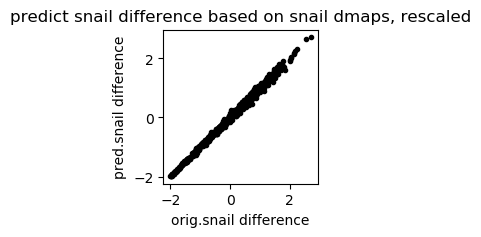

rescaled mse =  0.005534112464892459
dict_values([0.005534112464892459])


In [98]:

#use Smad Manifold to predicut Snail difference (fold change at 1 timepoint)
inputstr = 'snail dmaps'
outputstr = 'snail difference'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
snaildiff = ogdout[:,peak]-np.median(ogdout[:,basal])

X = evecs_out[:,ev_out]
Y = snaildiff.reshape(-1,1) #reshape to look like a 2d input

# plt.hist(snaildiff[dosage_data>0],density=True)
# plt.hist(snaildiff[dosage_data<0.5],density=True)
# plt.hist(snaildiff[dosage_data>0.5],density=True)
# plt.show()
max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
# msekeeper[outputstr]=mseeach


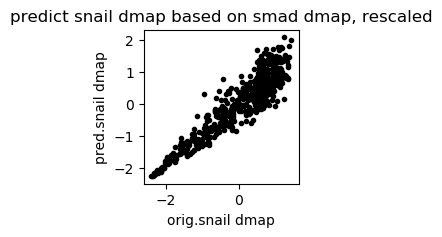

rescaled mse =  1.267874898147805
dict_values([0.14558780305239344, 1.7995578149521168, 1.8584790764389045])


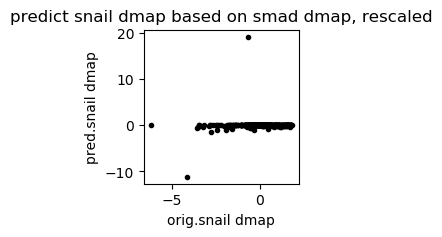

rescaled mse =  1.267874898147805
dict_values([0.14558780305239344, 1.7995578149521168, 1.8584790764389045])


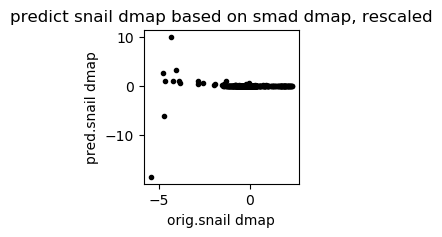

rescaled mse =  1.267874898147805
dict_values([0.14558780305239344, 1.7995578149521168, 1.8584790764389045])


In [99]:
#attempt to predict output DMAP using input Dmaps
# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = evecs_out[:,ev_out]


inputstr = 'smad dmap'
outputstr = 'snail dmap'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach


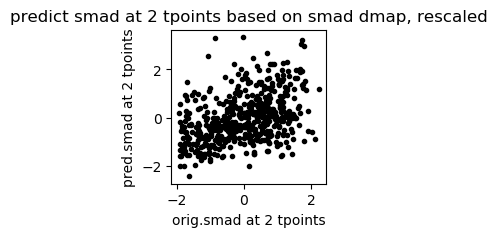

rescaled mse =  0.9598388121226048
dict_values([1.2009615735839505, 0.7187160506612592])


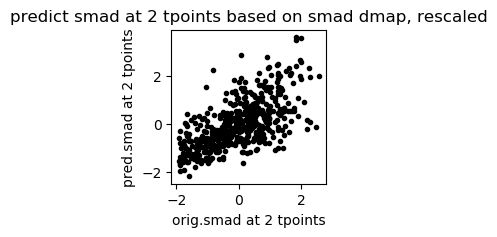

rescaled mse =  0.9598388121226048
dict_values([1.2009615735839505, 0.7187160506612592])


In [100]:
#attempt to predict input data at two timepoints using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = ogdin[:,[10,20]]


inputstr = 'smad dmap'
outputstr = 'smad at 2 tpoints'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
msekeeper[outputstr]=mseeach

In [101]:
def Gpy_eachtpoint(X,Yin0,samp_vec,messages,max_f_eval,inputstr,outputstr):
    Yin = Yin0[:,samp_vec]
    msearray = np.zeros(Yin.shape[1])
    for j in range(0,Yin.shape[1]):
        Y = Yin[:,j].reshape(-1,1)

        max_f_eval = 1000
        messages=False
        m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)

        xp,xstd = m.predict(X)
        x = Y
        y = xp
        x1,y1, mse, mseeach = msefunc(xp,Y)
        msearray[j]=mse
        print(j, end=" " )
    print('completed' + inputstr + outputstr)
    return msearray


In [102]:
msecombo={} #initialize the master msecombo

time_vec = time_data[1,:]
tsample = 3
tsamp = np.min([tsample,len(time_vec)])

print(len(time_vec))

axfact = 5
ax1 = np.ceil(len(time_vec)/2) - np.ceil(len(time_vec)/5)
ax2 = np.ceil(len(time_vec)/2) + np.ceil(len(time_vec)/5)
samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
print(samp_vec)
print(time_vec[samp_vec])

41
[12 21 30]
[16.2162 48.6486 81.084 ]


In [103]:
#attempt to predict input data at all timepoints using Smad Dmaps


inputstr = 'smad dmap'
outputstr = 'smad at each tpoint'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Yin = ogdin
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

inputstr = 'smad dmap'
outputstr = 'snail at each tpoint'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Yin = ogdout
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'f(smad)'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.0 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'f(smad_processed)'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = observed_data_in.copy()
mu, sigma = 0, 0.0 # mean and standard deviation
for j in range(0,observed_data_in.shape[1]):
    s = np.random.normal(mu, sigma, observed_data_in.shape[0])
    Z[:,j] = (observed_data_in[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapsmad at each tpoint
0 1 2 completedsmad dmapsnail at each tpoint
0 1 2 completedsmad dmapf(smad)
0 1 2 completedsmad dmapf(smad_processed)


In [104]:
inputstr = 'smad dmap'
outputstr = 'f(smad)+smallnoise'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.01 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapf(smad)+smallnoise


In [105]:
inputstr = 'smad dmap'
outputstr = 'f(smad)+mediumnoise'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 0.05 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = (ogdin[:,j]**2) + s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray


inputstr = 'smad dmap'
outputstr = 'noise only'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Z = ogdout.copy()
mu, sigma = 0, 1 # mean and standard deviation
for j in range(0,ogdin.shape[1]):
    s = np.random.normal(mu, sigma, ogdin.shape[0])
    Z[:,j] = s
    
Yin = Z
msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
msecombo[outputstr] = msearray

0 1 2 completedsmad dmapf(smad)+mediumnoise
0 1 2 completedsmad dmapnoise only


In [106]:
# d = {'a': 1, 'b': 2, 'c': 3}
print(msecombo.keys())
tvec = time_data[1,samp_vec]/60

def msecomboplotter(tvec,msecombo):
    plt.figure(figsize=(9,5))
    subkeep={}
    for k in msecombo.keys():
        v = msecombo[k]
      # k is now the key
      # v is the value
        subkeep[k]=v
        plt.semilogy(tvec,v,'*-', label=k)
        
#     plt.ylim(0.001,3)
    plt.ylabel('mean square error')
    plt.xlabel('time point, value')
    plt.title('error for different predictions based on Smad manifold') 
    plt.legend()
    plt.show()
        


dict_keys(['smad at each tpoint', 'snail at each tpoint', 'f(smad)', 'f(smad_processed)', 'f(smad)+smallnoise', 'f(smad)+mediumnoise', 'noise only'])


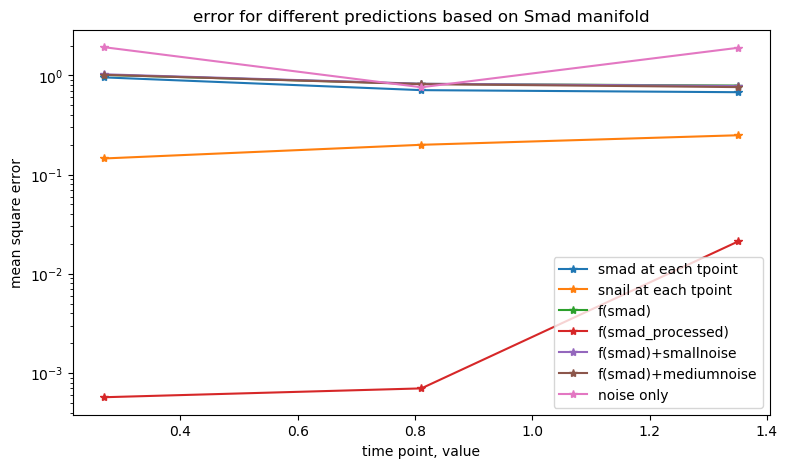

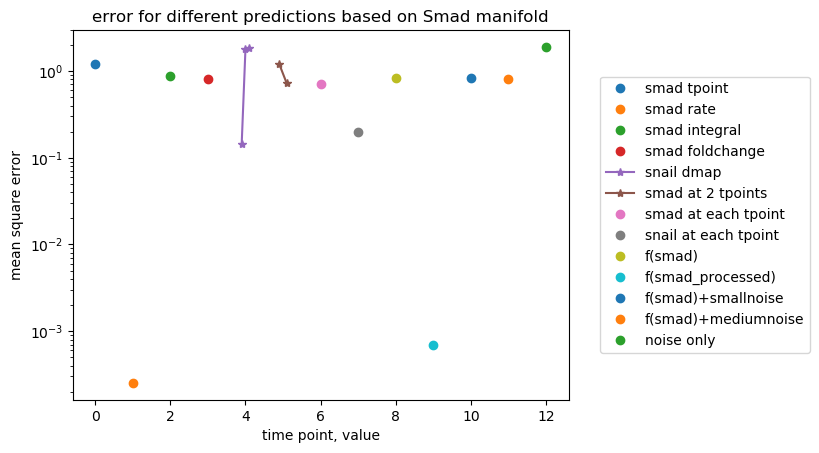

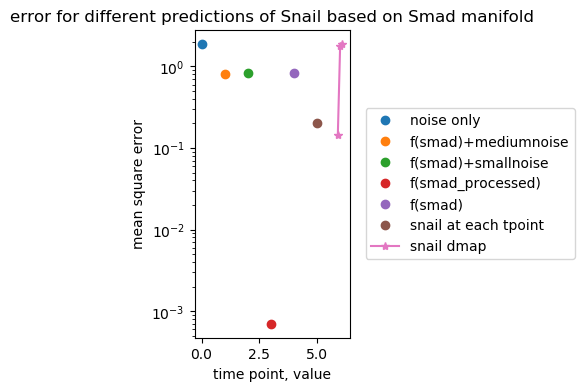

In [107]:
msecomboplotter(tvec,msecombo)
msekeeper2 = msekeeper
cycle=-1
for k in msecombo.keys():
    y={}
    cycle=cycle+1
    v = msecombo[k]
    y[cycle] = np.median(v)
    msekeeper2[k] = y

cycle=-1
for k in msekeeper2.keys():
    cycle=cycle+1
    v = msekeeper2[k]
  # k is now the key
  # v is the value
    y = v.values()
    if len(y)==1:
        x = cycle
        markerstr='o'
    else:
        x = np.linspace(cycle-0.1,cycle+0.1,len(y))
        markerstr='*-'
    plt.semilogy(x,y,markerstr, label=k)
    
# plt.ylim(0.01,1)
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for different predictions based on Smad manifold') 
plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
plt.show()
    
plt.figure(figsize=(2,4))
names2 = list(msekeeper2.keys())
namestouse = [names2[x] for x in [2,5,8,9]]
namestouse = [names2[x] for x in [-1,-2,-3,-4,-5,-6,-9]]
cycle=-1
for k in namestouse:
    cycle=cycle+1
    v = msekeeper2[k]
  # k is now the key
  # v is the value
    y = v.values()
    if len(y)==1:
        x = cycle
        markerstr='o'
    else:
        x = np.linspace(cycle-0.1,cycle+0.1,len(y))
        markerstr='*-'
    plt.semilogy(x,y,markerstr, label=k)
    
# plt.ylim(0.01,2)
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for different predictions of Snail based on Smad manifold') 
plt.legend(loc='right',bbox_to_anchor=(2.5, 0.5))
plt.show()
    
    